# Thumbnail Audit

The DPLA indexes URLs to item thumbnails.  DPLA recommends that thumbnails measure at least 150px on the longest edge, but providers give a wide diversity of actual sizes.  Analysis of a sample of thumbnails gives an overall picture of the image sizes DPLA is currently receiving from different providers.

*Feel free to ignore the code blocks in this document. They are necessary to render charts and visualizations.*

## Cleaning and sampling the data

The following process was used to clean and sample the data.  Steps were taken in the order described.

1. From a [Feb 2017 dump](https://dp.la/info/developers/download/?prefix=2017/02/)  of the DPLA index, items with properly formatted URLs in the thumbnail (i.e. "object") metadata field were selected.  Duplicate URLs were removed to reduce noise from items inadvertently indexed more than once, and from icons (e.g. the GPO icon used for [these items](https://dp.la/search?provider%5B%5D=United+States+Government+Publishing+Office+%28GPO%29)).

2. It would take an inordinate amount of time and/or processing power to analyze the entire dataset.  Instead, a five percent sample was taken.  The sample was stratfied by provider, meaning that five percent of _each provider's items_ was taken, rather than randomly sampling the entire dataset.

3. The pixel dimensions of each thumbnail were obtained via HTTP requests.  Any URLs that could not be mapped to image dimensions were removed from the sample.  Such failures resulted from issues like incorrect URLs.  

4. In order to analyze thumbnails, the longest edge of the image was calculated.  Considered alongside other possible metrics, such as the height, width, or area of the image, longest edge gives clear insight into the quality of browser-based user experience.  The following statistics and visualizations use the longest edge as the metric by which images are compared.

5. The sample contained ten extreme outliers (i.e. thumbnails with the longest edge between 2000 and 9000 pixels).  These were removed to prevent skewing of statistics and visualitions.

The cleaned and sampled dataset contains 633,602 thumbnails.  The [code](https://github.com/dpla/thumbnail-audit)  used for the majority of cleaning and sampling is available on github.  The code to remove extreme outliers is below.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("../data/longestEdge3/part-00000-8345241d-ffbd-484c-9d53-a4bd33c2e068.csv")
no_outliers = dataframe.loc[dataframe['longest_edge'] <= 2000]

# General overview of thumbnail dimensions

The following chart shows summary statistics about all the thumbnails in the sample.  Definitions of the summary stats are:

* **count** - The total number of thumbnails in the sample
* **mean** - The mean length (in pixels) of the longest edge of the thumbnail
* **std** - Standard deviation
* **min** - Smallest image length in the sample
* **25%** - 25th percentile (25% of thumbnails are less than this length on the longest edge)
* **50%** - 50th percentile (50% of thumbnails are less than this length on the longest edge)
* **75%** - 75th percentile (75% of thumbnails are less than this length on the longest edge)
* **max** - Largest image length in the sample (recall that ten outliers greater than 2000 were removed from the sample)

In [2]:
no_outliers.describe()

,longest_edge
count,633602.000000
mean,158.387349
std,214.319546
min,57.000000
25%,100.000000
50%,120.000000
75%,150.000000
max,2000.000000


The following histogram show the distribution of image sizes across all providers.  It shows that the vast majority of thumbnail images are 250px or less, with no other significant clusters.  Note that there are bars too small to render on this histogram.  The distribution of images greater than 250px will become clearer in the next visualization.

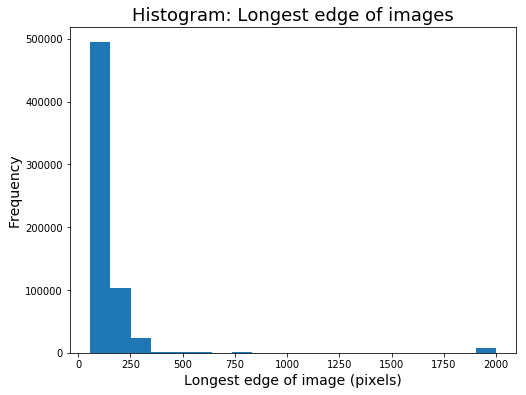

In [3]:
no_outliers['longest_edge'].plot.hist(bins=20, figsize=(8,6))
plt.title('Histogram: Longest edge of images', fontsize=18)
plt.xlabel('Longest edge of image (pixels)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Comparison of thumbnail dimensions by provider

The following box-and-whisker plot shows the distribution of thumbnail dimensions on the longest edge by provider.  Excluding outliers, no single provider has a maximum image length of more than 400px.  The vast majority of outliers greater than 400px are from the Smithsonian Institution.  Some providers, such as the University of Virginia Library, appear to be providing thumbnails of a single, consistent size.

To see a zoomable version of the plot, right click on the plot and open in a new tab.

This image from Nathan Yau's [How to Read and Use a Box-and-Whisker Plot](http://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/) may help you to interpret the visualization below.


<img src="http://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif?w=1090"/>


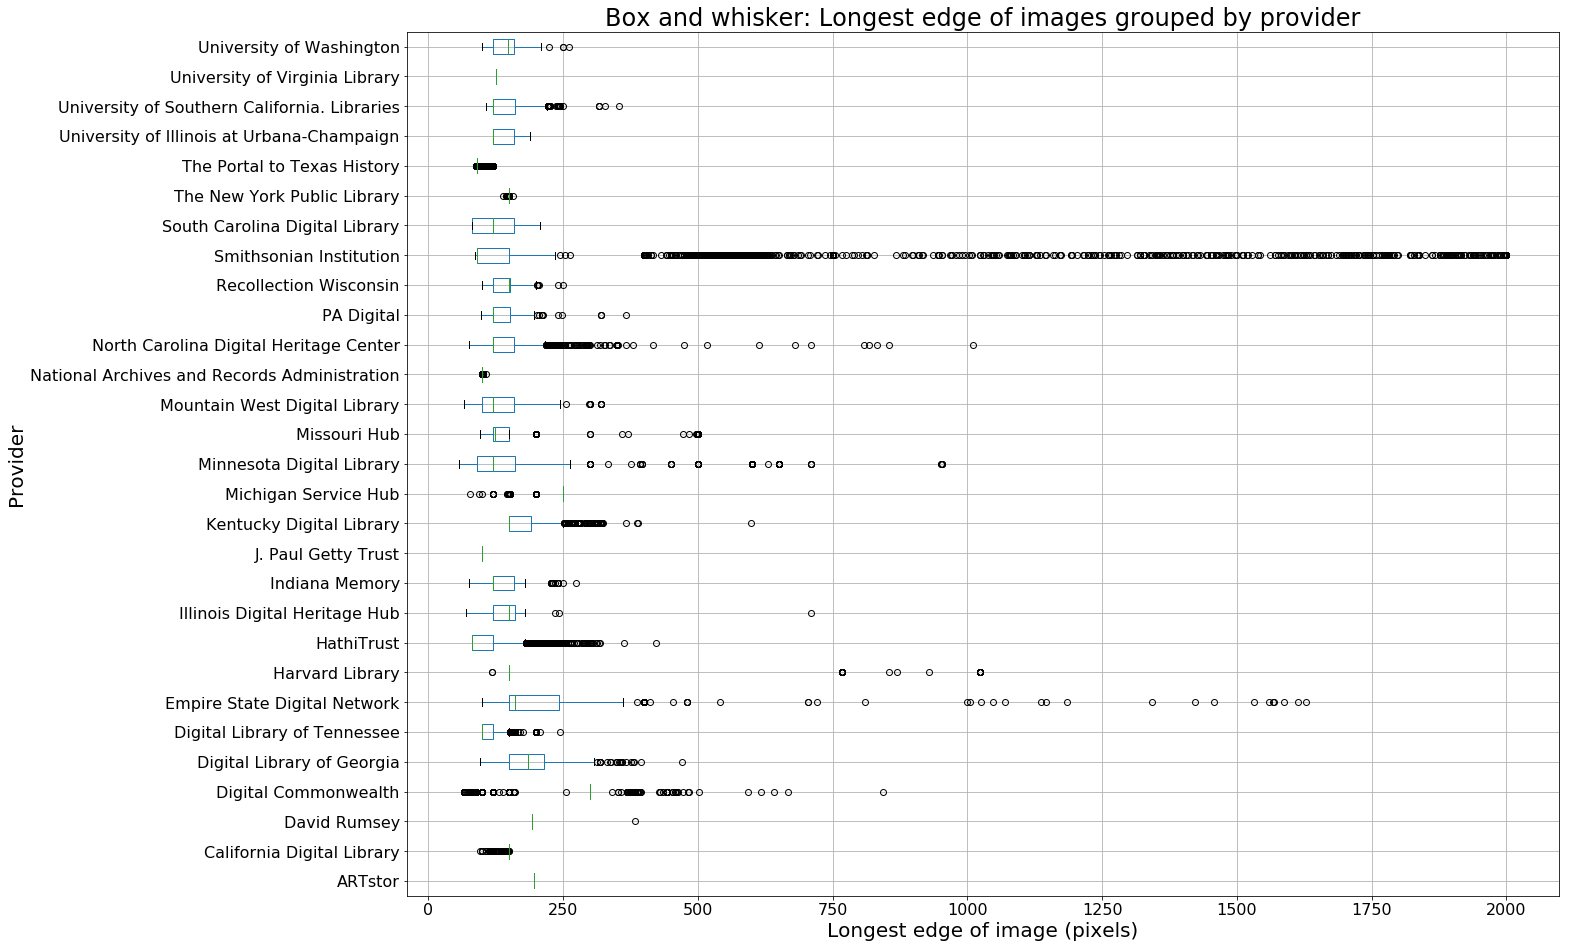

In [7]:
from matplotlib import rcParams
rcParams['figure.facecolor'] = 'white'

no_outliers.boxplot(by='provider', figsize=(20,16), vert=False, fontsize=16)
plt.xlabel('Longest edge of image (pixels)', fontsize=20)
plt.ylabel('Provider', fontsize=20)
plt.title('Box and whisker: Longest edge of images grouped by provider', fontsize=24)
plt.suptitle('')
plt.xticks(fontsize=16)
plt.show()